In [2]:
print "Hello world"


Hello world


In [3]:
print "Hello mummy"

Hello mummy


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

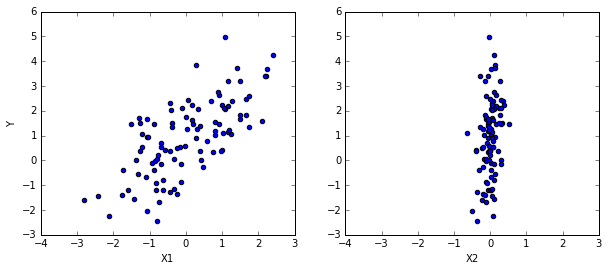

In [5]:
%matplotlib inline

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');


In [6]:
from pymc3 import Model, Normal, HalfNormal


In [8]:
basic_model = Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=2)
    sigma = HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=Y)
    
    

Applied log-transform to sigma and added transformed sigma_log to model.


In [9]:
from pymc3 import find_MAP

map_estimate = find_MAP(model=basic_model)

print(map_estimate)

{'alpha': array(0.9065985664354854), 'beta': array([ 0.948486  ,  2.60705513]), 'sigma_log': array(-0.03278146854842081)}


In [10]:
from scipy import optimize

map_estimate = find_MAP(model=basic_model, fmin=optimize.fmin_powell)

print(map_estimate)

{'alpha': array(0.9090521898978398), 'beta': array([ 0.95140146,  2.61437458]), 'sigma_log': array(-0.03000977520318259)}


In [11]:
from pymc3 import NUTS, sample

with basic_model:

    # obtain starting values via MAP
    start = find_MAP(fmin=optimize.fmin_powell)

    # draw 2000 posterior samples
    trace = sample(2000, start=start)

Assigned NUTS to alpha
Assigned NUTS to beta
Assigned NUTS to sigma_log
 [-----------------100%-----------------] 2000 of 2000 complete in 7.2 sec

In [12]:
trace['alpha'][-5:]

array([ 1.11510479,  1.00829739,  0.91034674,  0.91034674,  0.91034674])

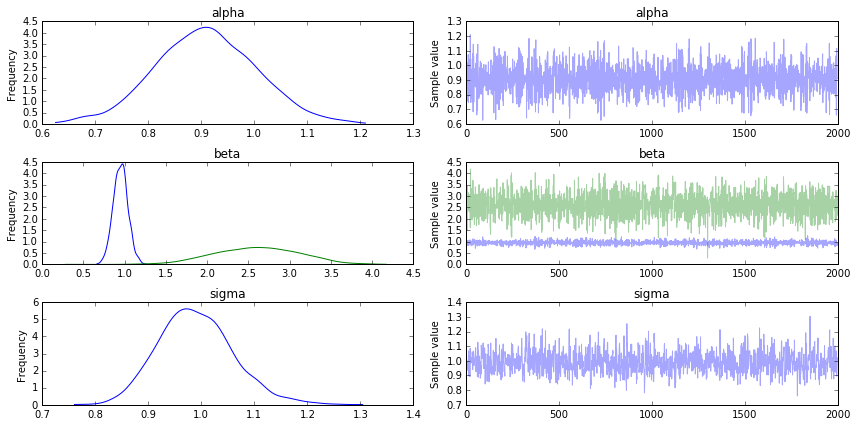

In [13]:
from pymc3 import traceplot

traceplot(trace);

In [14]:
from pymc3 import summary

summary(trace)



alpha:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.909            0.095            0.002            [0.726, 1.103]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.720          0.844          0.908          0.974          1.100


beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.950            0.088            0.002            [0.780, 1.125]
  2.605            0.507            0.011            [1.683, 3.590]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.779          0.891          0.950          1.007          1.125
  1.627          2.249          2.609   